In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [3]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import numpy as np
import yaml
import os
os.chdir("../")
from datasets.CrossDomain import CrossDomain
from datasets.Coco import Coco


load labels from:  logs/cross_domain_clean_div8/predictions/train
dict_keys(['image', 'image_cross_domain', 'valid_mask_file', 'name', 'points', 'valid_mask', 'labels_2D', 'labels_res', 'warped_labels_gaussian', 'warped_labels_bi', 'warped_img', 'warped_labels', 'warped_res', 'warped_valid_mask', 'homographies', 'inv_homographies', 'labels_2D_gaussian'])


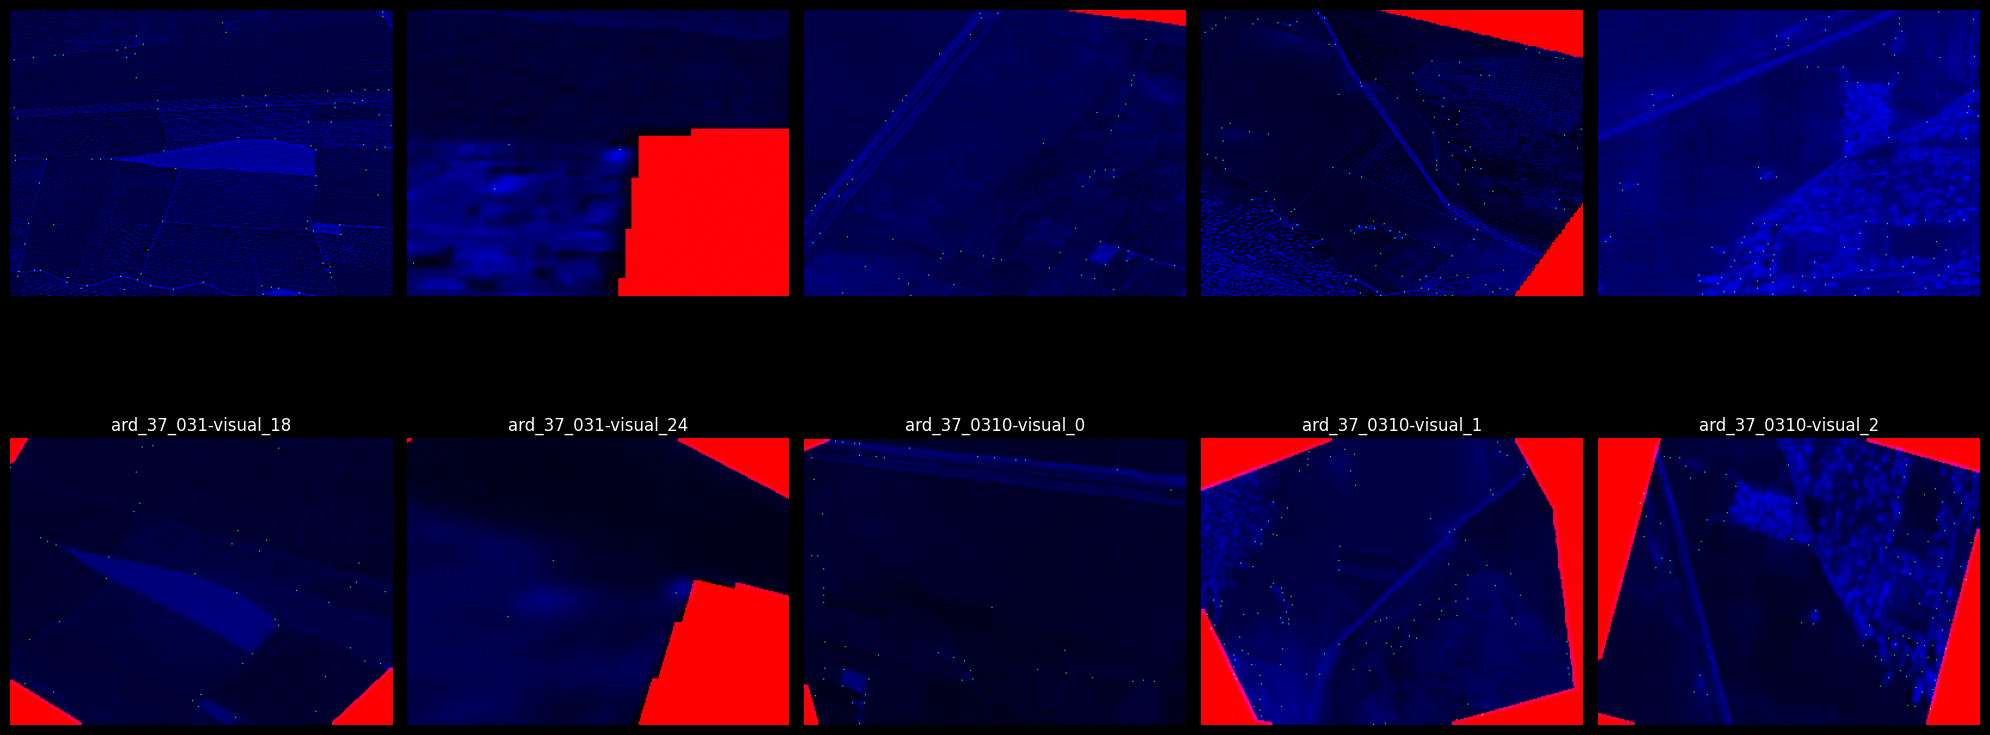

In [22]:
with open("/home/topkech/work/pytorch-superpoint/configs/cross_domain_train.yaml", "r") as f:
# with open("/home/topkech/work/pytorch-superpoint/configs/superpoint_coco_train_heatmap.yaml", "r") as f:
    config = yaml.safe_load(f)

# cd = Coco(task="train", **config["data"])
cd = CrossDomain(task="train", **config["data"])
print(cd[0].keys())
fig, axs = plt.subplots(2, 5, figsize=(20,10))
for axi, i in enumerate(range(100,105)):
    ex = cd[i]
    im = ex["image"][0][...,np.newaxis]
    im = np.dstack([1-ex["valid_mask"].squeeze()[..., np.newaxis], ex["labels_2D_gaussian"][0][...,np.newaxis], im])

    axs[0][axi].imshow(im)
    warped_im = ex["warped_img"][0][...,np.newaxis]
    warped_im = np.dstack([1-ex["warped_valid_mask"].squeeze()[..., np.newaxis], ex["warped_labels_gaussian"][0][...,np.newaxis], warped_im])
    axs[1][axi].imshow(warped_im)
    axs[1][axi].set_title(ex["name"][:10]+ex["name"][-10:])
    axs[0][axi].set_axis_off()
    axs[1][axi].set_axis_off()
plt.tight_layout()


In [4]:
from pathlib import Path
from tqdm.notebook import tqdm
import cv2
debug_path = Path("./debug")
debug_path.mkdir(exist_ok=True)

with open("/home/topkech/work/pytorch-superpoint/configs/cross_domain_train.yaml", "r") as f:
    config = yaml.safe_load(f)

cd = CrossDomain(task="train", **config["data"])
for i in tqdm(range(len(cd))):
    ex = cd[i]
    im = ex["image"][0][...,np.newaxis]
    im = np.dstack([1-ex["valid_mask"].squeeze()[..., np.newaxis], ex["labels_2D_gaussian"][0][...,np.newaxis], im])

    warped_im = ex["warped_img"][0][...,np.newaxis]
    warped_im = np.dstack([1-ex["warped_valid_mask"].squeeze()[..., np.newaxis], ex["warped_labels_gaussian"][0][...,np.newaxis], warped_im])
    imstack = np.clip(np.hstack([im, warped_im]) * 255, 0, 255).astype(np.uint8)
    imstack = cv2.cvtColor(imstack, cv2.COLOR_RGB2BGR)
    cv2.imwrite(str(debug_path/f"{ex['name']}.jpg"), imstack)


load labels from:  logs/export_cross_domain_clean/predictions/train


/home/topkech/mambaforge/envs/spsg/lib/python3.8/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


  0%|          | 0/7481 [00:00<?, ?it/s]

In [12]:
from pathlib import Path
from tqdm.notebook import tqdm
import cv2
debug_path = Path("./debug")
debug_path.mkdir(exist_ok=True)

with open("/home/topkech/work/pytorch-superpoint/configs/cross_domain_train.yaml", "r") as f:
    config = yaml.safe_load(f)
    config["data"]["labels"] = None
    config["data"]["homography_adaptation"] = {"enable": None}

cd = CrossDomain(task="train", export=True, **config["data"])
for i in tqdm(range(len(cd))):
    ex = cd[i]
    im = ex["image"][0][...,np.newaxis]
    imcd = ex["image_cross_domain"][0][...,np.newaxis]
    im = np.dstack([im, imcd, np.zeros_like(im)])

    imstack = np.clip(im * 255, 0, 255).astype(np.uint8)
    imstack = cv2.cvtColor(imstack, cv2.COLOR_RGB2BGR)
    cv2.imwrite(str(debug_path/f"{ex['name']}.jpg"), imstack)


  0%|          | 0/7481 [00:00<?, ?it/s]